# A study about recommendation

This notebook study recommendation methods, and compare then.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

recs_size = 100

df = pd.read_csv("data/user-item-interaction.csv")

In [5]:
df.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


# Clean Data

## Remove NA and duplicateds values

In [6]:
print(df.shape)

df.dropna(
    subset=['event_time', 'order_id', 'product_id', 'category_id', 'price', 'user_id'],
    inplace=True
)

df.dtypes
df.drop_duplicates('order_id', inplace=True)
print(df.shape)

(2633521, 8)
(400538, 8)


In [7]:
print(f"Produtos Cadastrados {df['product_id'].unique().shape[0]}")
print(f"Usuários unicos {df['user_id'].value_counts().shape[0]}")
print(f"Total de compras feitas desses produtos por esses usuários {df.shape[0]}")

Produtos Cadastrados 17985
Usuários unicos 98262
Total de compras feitas desses produtos por esses usuários 400538


In [57]:
#To run faster we will use data from last month
df = df[df['event_time'] >= "2020-10-21"]

# Transform product_id, user_id and category_id into sequential values to a better visualization
# to sequential values
df['product_id'] = df['product_id'].rank(method='dense', ascending=False).astype(int)
df['user_id'] = df['user_id'].rank(method='dense', ascending=False).astype(int)
df['category_id'] = df['category_id'].rank(method='dense', ascending=False).astype(int)


df.reset_index(drop=True ,inplace=True)
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-10-21 00:44:29 UTC,2388440981134624539,3936,2,electronics.video.tv,xiaomi,347.20,4336
1,2020-10-21 01:01:21 UTC,2388440981134625049,8218,448,computers.notebook,apple,1620.30,3958
2,2020-10-21 01:13:07 UTC,2388440981134625050,557,319,electronics.smartphone,samsung,694.42,3776
3,2020-10-21 01:29:43 UTC,2388440981134625051,8642,319,electronics.smartphone,apple,1317.57,3786
4,2020-10-21 01:34:49 UTC,2388440981134625052,3144,431,NaN,NaN,749.98,12508
...,...,...,...,...,...,...,...,...
67342,2020-11-21 10:08:14 UTC,2388440981134693940,2198,446,NaN,xiaomi,16.18,9587
67343,2020-11-21 10:08:54 UTC,2388440981134693941,3647,2,electronics.video.tv,samsung,1736.09,1828
67344,2020-11-21 10:10:01 UTC,2388440981134693942,3378,319,electronics.smartphone,oppo,138.87,3
67345,2020-11-21 10:10:13 UTC,2388440981134693943,8687,319,electronics.smartphone,apple,418.96,1


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

In [58]:
df["user_id"].value_counts().describe()

count    13075.000000
mean         5.150822
std         26.890509
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        319.000000
Name: user_id, dtype: float64

<AxesSubplot:>

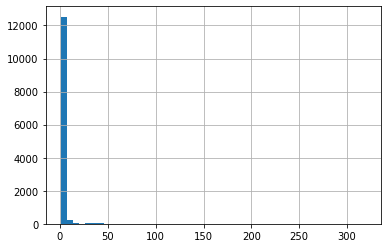

In [59]:
df["user_id"].value_counts().hist(bins = 50)

In [60]:
print(f"Produtos Cadastrados {df['product_id'].unique().shape[0]}")
print(f"Usuários unicos {df['user_id'].value_counts().shape[0]}")
print(f"Total de compras feitas desses produtos por esses usuários {df.shape[0]}")

Produtos Cadastrados 8819
Usuários unicos 13075
Total de compras feitas desses produtos por esses usuários 67347


In [61]:
# Produtos mais comprados
most_boughts = df.product_id.value_counts().index.to_list()[:5]

df.loc[df.product_id.isin(most_boughts)].drop_duplicates(['product_id'])

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
18,2020-10-21 02:52:48 UTC,2388440981134625066,3698,319,electronics.smartphone,samsung,173.59,3755
49,2020-10-21 04:10:01 UTC,2388440981134625099,347,448,computers.notebook,lenovo,416.64,460
54,2020-10-21 04:11:31 UTC,2388440981134625104,8805,319,electronics.smartphone,samsung,115.72,6079
100,2020-10-21 04:59:26 UTC,2388440981134625153,3459,319,electronics.smartphone,samsung,138.87,3732
2321,2020-10-22 11:43:05 UTC,2388440981134627470,7807,321,NaN,samsung,30.07,3453


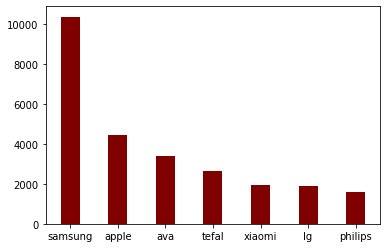

In [62]:
# Marca mais comprada
brand_most_boughts = df.brand.value_counts()[:7]

plt.bar(brand_most_boughts.index, brand_most_boughts.values,
        color ='maroon', width = 0.4)
plt.show()

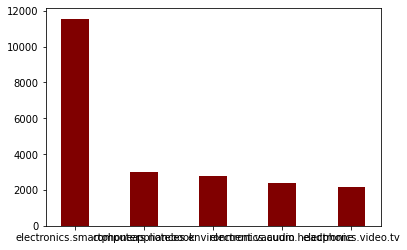

In [63]:
#Categoria mais comprada
category_most_boughts = df.category_code.value_counts()[:5]

plt.bar(category_most_boughts.index, category_most_boughts.values,
        color ='maroon', width = 0.4)
plt.show()

### <a class="anchor" id="Rank">Part II: Popular-based Recommendations</a>


### split train and test data, based on date

In [64]:
split_date = "2020-11-14" # 3 weeks to train, one to test

train = df[df['event_time'] < split_date]
test = df[df['event_time'] >= split_date]

### Get Best sellers products

In [65]:
def get_top_product_ids(n=recs_size, df=train):
    '''
    INPUT:
    n - (int) the number of top products to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_products - (list) A list of the top 'n' product titles 
    '''
    
    
    top_products_ids = df.product_id.value_counts().head(n).index.to_list()
    
    return top_products_ids 

def get_top_products(n=recs_size, df=train):
    '''
    INPUT:
    n - (int) the number of top products to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_products - (list) A list of the top 'n' product titles 
    '''
    
    top_products_ids = get_top_product_ids(n, df)
    
    top_products = [
        df.loc[df.product_id == i].iloc[0][["product_id","category_code", "brand"]].values.tolist()
        for i in top_products_ids
    ]
    
    return top_products

In [66]:
print(get_top_product_ids(10))
get_top_products(10)

[3698, 7807, 4966, 795, 347, 3459, 8785, 236, 8800, 8805]


[[3698, 'electronics.smartphone', 'samsung'],
 [7807, nan, 'samsung'],
 [4966, 'electronics.smartphone', 'samsung'],
 [795, 'electronics.smartphone', 'xiaomi'],
 [347, 'computers.notebook', 'lenovo'],
 [3459, 'electronics.smartphone', 'samsung'],
 [8785, 'electronics.smartphone', 'apple'],
 [236, 'electronics.smartphone', 'apple'],
 [8800, 'electronics.smartphone', 'samsung'],
 [8805, 'electronics.smartphone', 'samsung']]

## Evalueate recomendations by best sellers

In [67]:
agg = test.groupby("user_id")['product_id']

rank_preds = get_top_product_ids()

recs = [rank_preds for name, group in agg]
reals = [group.values.tolist() for name, group in agg]

In [68]:
#Implement more rating evaluations from here
#https://towardsdatascience.com/ranking-evaluation-metrics-for-recommender-systems-263d0a66ef54

def HitRate(recs, reals):
    hits = 0
    total = 0
    
    for rec, real in zip(recs, reals):
        for r in rec:
            if r in real:
                hits += 1
                break
        total += 1
    
    return hits/total

def AverageReciprocalHitRank(recs, reals):
    summation = 0
    total = 0
    
    for rec, real in zip(recs, reals):
        hitRank = 0
        rank = 0
        for r in rec:
            rank = rank + 1
            if r in real:
                hitRank = rank
                break
        
        if (hitRank > 0) :
            summation += 1.0 / hitRank

        total += 1
    
    return summation / total



In [69]:
recs

[[3698,
  7807,
  4966,
  795,
  347,
  3459,
  8785,
  236,
  8800,
  8805,
  2527,
  2528,
  8625,
  234,
  8751,
  8605,
  8779,
  8768,
  806,
  653,
  487,
  3301,
  557,
  3257,
  348,
  3377,
  8195,
  4964,
  8771,
  6452,
  3690,
  3699,
  346,
  6496,
  6371,
  3460,
  8812,
  3697,
  8507,
  8275,
  592,
  1870,
  4965,
  3654,
  8641,
  268,
  233,
  8565,
  8722,
  7986,
  7073,
  691,
  8742,
  7393,
  967,
  2718,
  5460,
  7368,
  235,
  8648,
  7933,
  2089,
  8204,
  8737,
  8327,
  3167,
  8686,
  8687,
  3689,
  5417,
  1748,
  8276,
  3339,
  3378,
  2255,
  2634,
  8568,
  6846,
  3568,
  7993,
  3536,
  344,
  8458,
  8656,
  2547,
  7675,
  8440,
  8787,
  513,
  8208,
  2569,
  8006,
  3457,
  6501,
  212,
  7361,
  4854,
  254,
  7506,
  504],
 [3698,
  7807,
  4966,
  795,
  347,
  3459,
  8785,
  236,
  8800,
  8805,
  2527,
  2528,
  8625,
  234,
  8751,
  8605,
  8779,
  8768,
  806,
  653,
  487,
  3301,
  557,
  3257,
  348,
  3377,
  8195,
  4964,
  877

In [16]:
HitRate(recs, reals)

0.2846858638743455

In [17]:
AverageReciprocalHitRank(recs, reals)

0.04179809110472094

### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


In [18]:
print(f"Produtos totais Cadastrados {df['product_id'].unique().shape[0]}")
print(f"Usuários unicos totais {df['user_id'].value_counts().shape[0]}")
print(f"Produtos Cadastrados em train {train['product_id'].unique().shape[0]}")
print(f"Usuários unicos totais em train {train['user_id'].value_counts().shape[0]}")

Produtos totais Cadastrados 8819
Usuários unicos totais 13075
Produtos Cadastrados em train 7604
Usuários unicos totais em train 10341


In [19]:
print(f"Total products in df {train['product_id'].unique().shape[0]}")
print(f"Total users in df {train['user_id'].value_counts().shape[0]}")

Total products in df 7604
Total users in df 10341


In [70]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df=train):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    
    user_item = df.groupby(['user_id', 'product_id'])['category_id'].count().unstack().notnull().astype(int) 
    
    return user_item  

user_item = create_user_item_matrix(train)

In [71]:
user_item

product_id,42,44,46,47,49,50,51,52,54,56,...,8810,8811,8812,8813,8814,8815,8816,8817,8818,8819
user_id,,,,,,,,,,,,,,,,,,,,,
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that you have a function that provides the most similar users to each user, you will want to use these users to find products you can recommend. Complete the functions below to return the articles you would recommend to each user.

In [72]:
def get_product_names(product_ids, df=train):
    '''
    INPUT:
    product_ids - (list) a list of product ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    product_names - (list) a list of product names associated with the list of product ids 
                    (this is identified by the title column)
    '''
    
    product_names = [df.loc[
        df.product_id == float(i)].iloc[0][["product_id","category_code", "brand"]].values.tolist() 
        for i in product_ids
    ]
    
    return product_names 


def get_user_products(user_id, df=train):
    '''
    INPUT:
    user_id - (int) a user id
    
    OUTPUT:
    product_ids - (list) a list of the product ids seen by the user
    product_names - (list) a list of product names associated with the list of product ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the product_ids and product titles that have been seen by a user
    '''
    user_products = df.loc[df['user_id'] == user_id]["product_id"].values.tolist()      
    
    return user_products # return the ids and names

In [73]:
get_user_products(13071)

[2023]

In [74]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    
    if user_id not in user_item.index.tolist():
        
        new_row = pd.DataFrame(dict.fromkeys(user_item.iloc[0].to_dict(), 0), index=[user_id])
        
        user_products_ids = get_user_products(user_id)[0]
                
        for item in user_products_ids:
            if item in new_row.columns.tolist():
                new_row[item] = 1
                
            
        # compute similarity of each user to the provided user
        similarity = user_item.dot(new_row.loc[user_id])
    else:
    '''
    similarity = user_item.dot(user_item.loc[user_id])
    
    # sort by similarity
    similarity = similarity.sort_values(ascending=False)
    # create list of just the ids
    most_similar_users = similarity.index.to_list()
    
    # remove the own user's id
    if user_id in most_similar_users:
        most_similar_users.remove(user_id)
    
    return most_similar_users # return a list of the users in order from most to least similar
        

In [23]:
top_products_ids = get_top_product_ids()

def user_user_recs(user_id, m=recs_size):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds products the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended products starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    
    user_product_ids = get_user_products(user_id)
    
    #If user has no boughts, recomend by rank
    if len(user_product_ids) < 1:
        return top_products_ids #I know that is not okay, but i'm going
    
    similar_users = find_similar_users(user_id)
    
    recs = []
    for user in similar_users:
        product_ids, product_names = get_user_products(user)
        
        for i in product_ids:
            if(i not in user_product_ids and i not in recs):
                recs.append(i)
                if len(recs) >= m:
                    return recs
                
    return recs # return your recommendations for this user_id    

In [24]:
get_product_names(user_user_recs(45, m=10))

[[3698, 'electronics.smartphone', 'samsung'],
 [7807, nan, 'samsung'],
 [4966, 'electronics.smartphone', 'samsung'],
 [795, 'electronics.smartphone', 'xiaomi'],
 [347, 'computers.notebook', 'lenovo'],
 [3459, 'electronics.smartphone', 'samsung'],
 [8785, 'electronics.smartphone', 'apple'],
 [236, 'electronics.smartphone', 'apple'],
 [8800, 'electronics.smartphone', 'samsung'],
 [8805, 'electronics.smartphone', 'samsung'],
 [2527, 'appliances.environment.vacuum', 'samsung'],
 [2528, 'appliances.environment.vacuum', 'samsung'],
 [8625, 'computers.network.router', 'tp-link'],
 [234, 'electronics.smartphone', 'apple'],
 [8751, 'electronics.smartphone', 'apple'],
 [8605, 'electronics.smartphone', 'samsung'],
 [8779, 'electronics.audio.headphone', 'apple'],
 [8768, 'electronics.smartphone', 'samsung'],
 [806, 'electronics.smartphone', 'xiaomi'],
 [653, 'computers.notebook', 'asus'],
 [487, 'electronics.audio.headphone', 'xiaomi'],
 [3301, 'computers.network.router', 'beeline'],
 [557, 'elect

## Evaluate Model



In [39]:
agg = test.groupby("user_id")['product_id'].apply(set)

recs = [user_user_recs(i) for i in agg.index]
reals = [i for i in agg.values]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280

5059
5061
5064
5070
5071
5073
5078
5079
5081
5085
5086
5090
5091
5096
5099
5104
5106
5107
5109
5112
5114
5115
5117
5118
5127
5129
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5148
5150
5154
5158
5161
5171
5174
5177
5179
5180
5181
5186
5188
5190
5197
5198
5199
5202
5213
5221
5222
5223
5224
5225
5226
5228
5230
5231
5233
5236
5240
5244
5245
5246
5251
5252
5256
5263
5266
5267
5268
5269
5270
5272
5274
5278
5279
5280
5282
5292
5296
5297
5298
5299
5301
5302
5303
5304
5305
5310
5311
5314
5318
5319
5323
5325
5328
5329
5330
5333
5336
5340
5346
5351
5353
5360
5363
5366
5373
5374
5378
5379
5380
5383
5384
5389
5394
5398
5399
5400
5404
5407
5412
5413
5414
5423
5424
5425
5427
5428
5429
5433
5436
5442
5451
5454
5457
5459
5460
5462
5463
5464
5466
5471
5473
5481
5485
5487
5490
5492
5494
5496
5504
5506
5507
5511
5517
5526
5529
5531
5537
5539
5540
5541
5542
5546
5550
5553
5559
5567
5568
5569
5570
5571
5576
5577
5579
5589
5591
5592
5599
5601
5602
5605
5606
5615
5616
5619
5620
5623
5637
5640
5642


9118
9122
9124
9130
9137
9141
9144
9153
9155
9166
9168
9178
9180
9185
9188
9192
9194
9195
9196
9201
9203
9207
9208
9212
9216
9217
9219
9221
9222
9227
9236
9237
9239
9244
9245
9255
9256
9258
9265
9271
9275
9276
9285
9287
9291
9294
9295
9298
9303
9307
9312
9316
9319
9327
9329
9332
9337
9338
9339
9344
9346
9349
9351
9363
9365
9369
9370
9374
9380
9381
9392
9403
9406
9409
9410
9418
9419
9426
9428
9430
9432
9433
9435
9438
9443
9446
9452
9453
9456
9461
9466
9470
9477
9480
9482
9487
9489
9492
9493
9499
9505
9509
9514
9518
9527
9537
9543
9544
9547
9552
9556
9559
9562
9586
9587
9588
9591
9593
9597
9598
9599
9601
9602
9603
9611
9613
9620
9622
9624
9628
9631
9633
9636
9638
9639
9641
9642
9644
9645
9649
9661
9665
9677
9678
9681
9684
9687
9688
9691
9692
9699
9700
9703
9707
9708
9709
9710
9718
9719
9723
9726
9732
9733
9734
9737
9738
9747
9750
9754
9757
9759
9761
9762
9767
9768
9770
9773
9776
9778
9783
9786
9795
9797
9799
9805
9812
9817
9822
9826
9827
9828
9837
9838
9839
9843
9846
9849
9853
9855
9859


In [42]:
print(HitRate(recs, reals))
AverageReciprocalHitRank(recs, reals)

0.34227748691099474


0.0584013646828746

Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer product interactions.

Instead of arbitrarily choosing products from the user where the number of recommended products starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be what would be obtained from the top_articles function you wrote earlier.

In [90]:
def get_top_sorted_users(user_id, df=train, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by products: 
            1's when a user has interacted with an product, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of products viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''

    # Your code here
    similarity = user_item.dot(user_item.loc[user_id])
    
    neighbors_df = pd.DataFrame({"neighbor_id": similarity.index.to_list(), 
                                 "similarity": similarity.to_list(),
                                 "num_interactions": [user_item.loc[i].sum() for i in similarity.index.to_list()]
                                })
    neighbors_df.sort_values(by = ['similarity', 'num_interactions'], ascending = [False, True], inplace=True)
    
    neighbors_df.drop(neighbors_df.index[neighbors_df['neighbor_id'] == user_id], inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    print(user_id)
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by product id
    rec_names - (list) a list of recommendations for the user by product title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds products the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total product interactions 
    before choosing those with fewer product interactions.

    * Choose products with the products with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    user_product_ids = get_user_products(user_id)
    #If user has no boughts, recomend by rank
    if len(user_product_ids) < 1:
        return top_products_ids
    
    top_sorted_users = get_top_sorted_users(user_id)
    
    similar_users = find_similar_users(user_id)
        
    recs = []
    for user in similar_users:
        product_ids = get_user_products(user)
        
        for i in product_ids:
            if(i not in user_product_ids and i not in recs):
                recs.append(i)
                if len(recs) >= m:       
                    return recs, get_product_names(recs)
                 
    return recs, get_product_names(recs)

In [91]:
agg = test.groupby("user_id")['product_id'].apply(list)

recs = [user_user_recs_part2(i) for i in agg.index]
reals = [i for i in agg.values]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280

KeyboardInterrupt: 

In [33]:
rec_ids, rec_names = user_user_recs_part2(40895, 10)
print("The top 10 recommendations for user 40895 are the following product ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 40895 are the following products names:")
print(rec_names)

The top 10 recommendations for user 40895 are the following product ids:
[13071, 10796, 16812, 14421, 9626, 17006, 7076, 10708, 6019, 6141]

The top 10 recommendations for user 40895 are the following products names:
[[13071, nan, nan], [10796, nan, 'ava'], [16812, 'computers.peripherals.mouse', 'genius'], [14421, 'appliances.kitchen.microwave', 'hotpoint-ariston'], [9626, 'stationery.battery', 'duracell'], [17006, nan, 'philips'], [7076, 'electronics.smartphone', 'samsung'], [10708, nan, 'tefal'], [6019, 'appliances.kitchen.refrigerators', 'ava'], [6141, 'electronics.smartphone', 'samsung']]


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations</a>

### Category based recommendation

Maybe it's not a good choice, because when a user buys an eletronic it will take a while when the users will have to buy it again

Maybe it's is not a good option, because when user buy a 

In [29]:
def get_product_frequent_category(products_ids, min_influency=.1 , df=train):
    
    # get bougths products
    products = df[df.product_id.isin(list(map(int,products_ids)))].drop_duplicates("category_code") 
    
    # show categorys that represents at least min_influency % of all purchases
    
    top_categories = products['category_code'].value_counts(normalize=True)[
        products['category_code'].value_counts(normalize=True) >= min_influency
    ]
    
    user_top_categories = top_categories.index.to_list()
    return user_top_categories

def category_based_recs(user_id, m=recs_size, df=train):
    print(user_id)
    '''
    Args:
        user_id (bool) - if true, make recs based on user
        m (int) - number of recommendations to give based on term
    Returns:
        recs (list) - list of product ids that are recommended
        rec_names (list) - list of product names that are recommended   
        
        
    Description:
        Recommened products based on user most consumed product styles
    '''
    
    product_ids = get_user_products(user_id)  
    
    top_products_ids = get_top_product_ids(df.shape[0])
    
    if len(product_ids) < 1:
        return top_products_ids
    
    user_top_categories = get_product_frequent_category(product_ids)
    
    
    
    
    prefered_category_product = df.loc[df['category_code'].isin(user_top_categories)]
        
    top_recs_by_category = []
    
    
    #Map products id to int to use in for if's
    product_ids = map(int, product_ids)
    for i in top_products_ids:
        if len(top_recs_by_category) > m: break
            
        if (i in prefered_category_product['product_id'].values and i not in product_ids):
            top_recs_by_category.append(i)
            

    
    return top_recs_by_category

In [30]:
get_product_names(category_based_recs(4336, m=10))


4336


[[347, 'computers.notebook', 'lenovo'],
 [653, 'computers.notebook', 'asus'],
 [348, 'computers.notebook', 'lenovo'],
 [8771, 'electronics.video.tv', 'ava'],
 [346, 'computers.notebook', 'lenovo'],
 [8722, 'electronics.video.tv', 'lg'],
 [3568, 'electronics.video.tv', 'samsung'],
 [3536, 'electronics.video.tv', 'lg'],
 [344, 'computers.notebook', 'lenovo'],
 [3578, 'electronics.video.tv', 'samsung'],
 [645, 'computers.notebook', 'lenovo']]

In [31]:
agg = test.groupby("user_id")['product_id'].apply(set)

recs = [category_based_recs(i) for i in agg.index]
reals = [i for i in agg.values]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
170
171
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280

5117
5118
5127
5129
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5148
5150
5154
5158
5161
5171
5174
5177
5179
5180
5181
5186
5188
5190
5197
5198
5199
5202
5213
5221
5222
5223
5224
5225
5226
5228
5230
5231
5233
5236
5240
5244
5245
5246
5251
5252
5256
5263
5266
5267
5268
5269
5270
5272
5274
5278
5279
5280
5282
5292
5296
5297
5298
5299
5301
5302
5303
5304
5305
5310
5311
5314
5318
5319
5323
5325
5328
5329
5330
5333
5336
5340
5346
5351
5353
5360
5363
5366
5373
5374
5378
5379
5380
5383
5384
5389
5394
5398
5399
5400
5404
5407
5412
5413
5414
5423
5424
5425
5427
5428
5429
5433
5436
5442
5451
5454
5457
5459
5460
5462
5463
5464
5466
5471
5473
5481
5485
5487
5490
5492
5494
5496
5504
5506
5507
5511
5517
5526
5529
5531
5537
5539
5540
5541
5542
5546
5550
5553
5559
5567
5568
5569
5570
5571
5576
5577
5579
5589
5591
5592
5599
5601
5602
5605
5606
5615
5616
5619
5620
5623
5637
5640
5642
5648
5649
5653
5656
5657
5660
5661
5662
5663
5669
5670
5673
5683
5690
5693
5695
5696
5701
5702
5709
5710
5712


9344
9346
9349
9351
9363
9365
9369
9370
9374
9380
9381
9392
9403
9406
9409
9410
9418
9419
9426
9428
9430
9432
9433
9435
9438
9443
9446
9452
9453
9456
9461
9466
9470
9477
9480
9482
9487
9489
9492
9493
9499
9505
9509
9514
9518
9527
9537
9543
9544
9547
9552
9556
9559
9562
9586
9587
9588
9591
9593
9597
9598
9599
9601
9602
9603
9611
9613
9620
9622
9624
9628
9631
9633
9636
9638
9639
9641
9642
9644
9645
9649
9661
9665
9677
9678
9681
9684
9687
9688
9691
9692
9699
9700
9703
9707
9708
9709
9710
9718
9719
9723
9726
9732
9733
9734
9737
9738
9747
9750
9754
9757
9759
9761
9762
9767
9768
9770
9773
9776
9778
9783
9786
9795
9797
9799
9805
9812
9817
9822
9826
9827
9828
9837
9838
9839
9843
9846
9849
9853
9855
9859
9861
9865
9867
9875
9881
9882
9885
9887
9890
9895
9896
9897
9900
9908
9921
9927
9930
9933
9934
9936
9938
9940
9943
9945
9946
9949
9950
9955
9959
9963
9965
9968
9980
9985
9987
9988
9996
9997
9998
10003
10005
10006
10011
10016
10019
10022
10027
10031
10037
10042
10050
10053
10054
10056
10059
1006

In [32]:
print(HitRate(recs, reals))
AverageReciprocalHitRank(recs, reals)

0.5835514834205934


0.033818321240932515

## Matrix Factorization

In [27]:
def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    
    user_item_train = create_user_item_matrix(df_train)
    
    user_item_test = create_user_item_matrix(df_test)
    
    test_idx = list(df_test["user_id"].unique())
    
    test_arts = list(df_test["product_id"].unique())
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(train, test)

In [28]:
user_item_train.shape, user_item_test.shape, len(test_idx), len(test_arts)

((10341, 7604), (4584, 5260), 4584, 5260)

In [33]:
print("we can make predictions about {} users".format(len(np.intersect1d(list(train['user_id'].unique()), test_idx))))
print("we can make predictions about {} products".format(len(np.intersect1d(list(train['product_id'].unique()), test_idx))))


we can make predictions about 1850 users
we can make predictions about 2871 products


In [22]:
from scipy.sparse import csr_matrix

S = csr_matrix(user_item)
S

<13075x8819 sparse matrix of type '<class 'numpy.int64'>'
	with 59740 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.utils.extmath import randomized_svd

u_train, s_train, vt_train = randomized_svd(S, 
                          n_components=600,
                          n_iter=5,
                          random_state=None)

In [45]:

s_train.shape, u_train.shape, vt_train.shape

((600,), (13075, 600), (600, 8819))

In [46]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data
train_idx = list(train['user_id'].unique())
train_arts = list(train['product_id'].unique())

intersect_users = np.intersect1d(train_idx, test_idx) 
intersect_articles = np.intersect1d(train_arts, test_arts)


# Get new matrix idx for intersect users and articles

new_train_idx = np.where(np.in1d(train_idx, intersect_users))[0]
new_train_arts = np.where(np.in1d(train_arts, intersect_articles))[0]

new_test_idx = np.where(np.in1d(test_idx, intersect_users))[0]
new_test_arts = np.where(np.in1d(test_arts, intersect_articles))[0]

new_test_idx.shape, new_train_idx.shape, new_train_arts.shape

((1850,), (1850,), (4045,))

In [47]:
#Mout new traint and test matrix using only interct values

test_set = user_item_test.iloc[new_test_idx, new_test_arts]
train_set = user_item_train.iloc[new_train_idx, new_train_arts]

print(train_set.shape)
test_set.shape

(1850, 4045)


(1850, 4045)

In [53]:
k = 25
s_train_k = np.zeros((k, k))
s_train_k[:k, :k] = np.diag(s_train[:k])

u_train_k = u_train[:, :k]
vt_train_k =  vt_train[:k, :]

# Update shape of u, s and vt for test matrix 
s_test_k = s_train_k

u_test_k = u_train_k[new_train_idx,:]
vt_test_k =  vt_train_k[:,new_train_arts]

# Compute the dot product
pred_ratings = np.dot(np.dot(u_test_k, s_test_k), vt_test_k)

pred_ratings[0]

array([ 1.26796780e-28, -1.88925745e-21,  3.91128075e-18, ...,
        8.88291474e-17,  9.17128024e-16,  1.19672687e-15])

In [49]:
latent_features = np.arange(1,601,5)
err = []

for k in latent_features:

    # Update shape of u, s and vt for train matrix
    s_train_k = np.zeros((k, k))
    s_train_k[:k, :k] = np.diag(s_train[:k])

    u_train_k = u_train[:, :k]
    vt_train_k =  vt_train[:k, :]
    
    # Update shape of u, s and vt for test matrix 
    s_test_k = s_train_k

    u_test_k = u_train_k[new_train_idx,:]
    vt_test_k =  vt_train_k[:,new_train_arts]
    
    # Compute the dot product
    pred_ratings = np.dot(np.dot(u_test_k, s_test_k), vt_test_k)

    # Compute the squared error for each predicted vs. actual rating
    sum_square_errs = np.sum(np.sum((test_set - pred_ratings)**2))
    
    err.append(sum_square_errs)

test_set.shape

(1850, 4045)

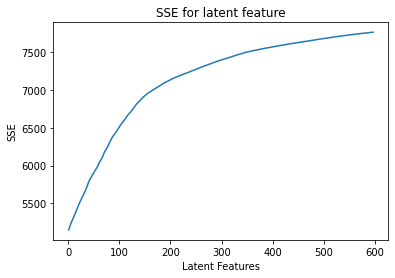

In [50]:
plt.plot(latent_features, err)
plt.title('SSE for latent feature')
plt.xlabel('Latent Features')
plt.ylabel('SSE')
plt.show()

## Surprise

### <a class="anchor" id="Evaluate">Evaluate Systems</a>

## Desire Metrics 
Mean Absolute Error - MAE
Mean Squared Error - MSE
Root Mean Squared Error - RMSE
Normalized Mean Absolute Error - NMAE

### rank accuracy metrics

HR (Hit Ratio)
MRR (Mean Reciprocal Rank)
MAP (Mean Average Precision)
NDCG (Normalized Discounted Cumulative Gain)

(References)[https://towardsdatascience.com/ranking-evaluation-metrics-for-recommender-systems-263d0a66ef54]

In [ ]:
def calculate_hit_radio(user_items, user_recs):
    hits = 0    
    for item in user_items:
        if item in user_recs: hits += 1
            
    return hits / len(user_items)



In [ ]:
recs = get_top_product_ids(15)


In [ ]:
print()